In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import datetime as dt

In [10]:
article_data = pd.read_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Science\Data Analytics\ArticleData\ArticleData\article_information.csv', low_memory=False)

In [5]:
article_data.head()

,ArticleID,Title,Journal,PubDate,Volume,Issue,Page
0,10.1103/PhysRevApplied.6.064012,Method to Control Dynamic Snap-Through Instabi...,Phys. Rev. Applied,2016-12-23,6,6,064012
1,10.1103/PhysRevApplied.6.024026,Thin Circular Diamond Membrane with Embedded N...,Phys. Rev. Applied,2016-08-31,6,2,024026
2,10.1103/PhysRevApplied.6.064004,Simultaneous Rheoelectric Measurements of Stro...,Phys. Rev. Applied,2016-12-09,6,6,064004
3,10.1103/PhysRevApplied.6.014003,Fragility of Nonlocal Edge-Mode Transport in t...,Phys. Rev. Applied,2016-07-07,6,1,014003
4,10.1103/PhysRevApplied.6.064028,Nonvolatile Multilevel Memory and Boolean Logi...,Phys. Rev. Applied,2016-12-30,6,6,064028


In [24]:
article_data.groupby('Title')['Journal'].nunique().reset_index(name = 'unq_jrnl_cnt')['unq_jrnl_cnt'].unique()

array([ 1,  2,  3,  4,  5,  9,  6, 11,  7])

In [6]:
article_data.Title.unique().size

592437

In [6]:
article_data.shape

(596786, 7)

In [4]:
citations_rel_data = pd.read_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Science\Data Analytics\ArticleData\ArticleData\citation_relationships.csv')

In [5]:
citations_rel_data.head()

,CitingArticleID,CitedArticleID
0,10.1103/PhysRevSeriesI.11.215,10.1103/PhysRevSeriesI.1.1
1,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.1.1
2,10.1103/RevModPhys.51.863,10.1103/PhysRevSeriesI.1.1
3,10.1103/PhysRevSeriesI.4.433,10.1103/PhysRevSeriesI.1.1
4,10.1103/PhysRevSeriesI.2.161,10.1103/PhysRevSeriesI.1.1


In [6]:
citations_rel_data.shape

(7211977, 2)

> 1) Graph the number of articles (uniquely identified through their ArticleID) published each year.

In [12]:
article_data['PubYear'] = pd.to_datetime(article_data['PubDate']).apply(lambda x: x.year)

In [13]:
articles_pub_each_year_data = article_data.groupby('PubYear')['ArticleID'].nunique().reset_index(name = 'Number_Of_Articles')

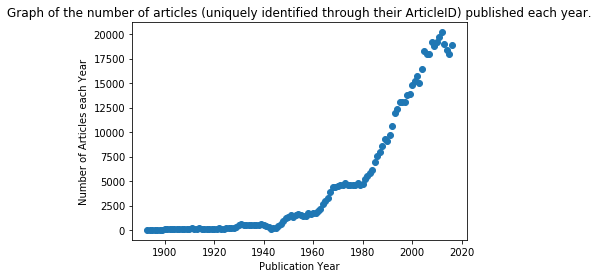

In [14]:
plt.plot(articles_pub_each_year_data['PubYear'], articles_pub_each_year_data['Number_Of_Articles'], 'o');
plt.title('Graph of the number of articles (uniquely identified through their ArticleID) published each year.');
plt.xlabel('Publication Year');
plt.ylabel('Number of Articles each Year');

> 2) Graph the distribution of the number of references and number of citations per article (references are Cited articles, while citations are Citing articles).

In [15]:
references_data = citations_rel_data.groupby('CitedArticleID')['CitingArticleID'].nunique().reset_index(name = 'Number_of_unique_references')

In [16]:
citations_data = citations_rel_data.groupby('CitingArticleID')['CitedArticleID'].nunique().reset_index(name = 'Number_of_unique_citations')

In [21]:
references_data.head()

,CitedArticleID,Number_of_unique_references
0,10.1103/PhysRev.1.1,27
1,10.1103/PhysRev.1.124,8
2,10.1103/PhysRev.1.16,4
3,10.1103/PhysRev.1.161,1
4,10.1103/PhysRev.1.2,2


In [25]:
citations_data.head()
citations_data.shape

(576660, 2)

In [26]:
references_data.shape

(515867, 2)

In [17]:
import seaborn as sns

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


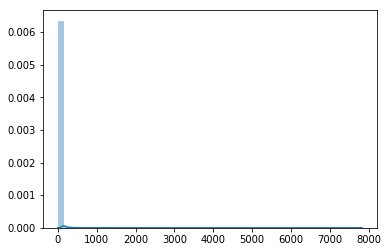

In [18]:
sns.distplot(references_data['Number_of_unique_references'].values);

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


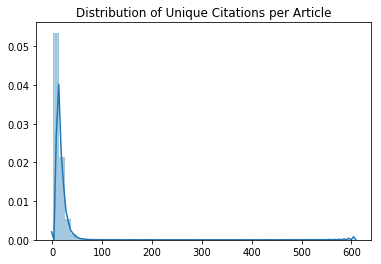

In [19]:
sns.distplot(citations_data['Number_of_unique_citations'].values);
plt.title('Distribution of Unique Citations per Article');

In [20]:
sns.distplot(references_data['Number_of_unique_references'].values, hist=False, rug=True);
plt.title('Distribution of Unique References per Article');

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000013DE18BA620> (for post_execute):


ValueError: object too deep for desired array

ValueError: object too deep for desired array

<Figure size 432x288 with 1 Axes>

In [ ]:
plt.hist(references_data['Number_of_unique_references']);

In [ ]:
sns.kdeplot(references_data['Number_of_unique_references'], shade=True);

In [ ]:
sns.kdeplot(citations_data['Number_of_unique_citations'], shade=True);

> Formulate your own hypothesis and either verify or falsify it using the data.

##### Chi-Square test to identify if Journal is dependent upon the Article Title or not.

<div class="alert-info">
<br>Hypothesis Testing Using Chi-Square test as both predictor and response variables are categorical variables: <br>
<br>Null Hypothesis: 'PubYear' is independent of 'Journal'.<br>
<br>Alternative Hypothesis: 'PubYear' is dependent on the 'Journal'.<br>
</div>

In [13]:
from scipy.stats import chi2_contingency

In [17]:
contingency_table = pd.crosstab(article_data['Journal'], article_data['PubYear'], margins = True).reset_index()

In [18]:
chi2_contingency(contingency_table[contingency_table.columns[1:-1]].values)

(1190933.6173287965,
 0.0,
 1968,
 array([[1.60660605e+00, 2.89189090e+00, 2.89189090e+00, ...,
         1.47855955e+03, 1.44723073e+03, 1.51952801e+03],
        [4.92303774e-02, 8.86146793e-02, 8.86146793e-02, ...,
         4.53067163e+01, 4.43467240e+01, 4.65620909e+01],
        [2.45716220e+00, 4.42289196e+00, 4.42289196e+00, ...,
         2.26132637e+03, 2.21341171e+03, 2.32398401e+03],
        ...,
        [2.75140503e-02, 4.95252905e-02, 4.95252905e-02, ...,
         2.53211805e+01, 2.47846565e+01, 2.60227887e+01],
        [1.09318918e-01, 1.96774053e-01, 1.96774053e-01, ...,
         1.00606201e+02, 9.84744816e+01, 1.03393833e+02],
        [2.00000000e+01, 3.60000000e+01, 3.60000000e+01, ...,
         1.84060000e+04, 1.80160000e+04, 1.89160000e+04]]))

<div class="alert-success">
p-value = 0.0 which means the results are highly signuficant and have not occured by chance. Hence we reject the null hypothesis and can state that PubYear is dependent on Journal.
</div>